<a href="https://colab.research.google.com/github/MohamedFarhun/DeterminedAI-HotelBookingCancellation/blob/main/DeterminedAI_Training_and_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install determined

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix,classification_report, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('DeterminedHotelBookingcancellation_training_testing_model.csv')
df.head()

,BookingID,LeadTime,ArrivalYear,ArrivalMonth,ArrivalDate,MealPlan,Parking,RoomType,MarketSegment,RepeatedGuest,NumPrevCancellations,NumPreviousNonCancelled,AvgRoomPrice,SpecialRequests,BookingStatus,guests,arrival_date,total_stays,lead_time_month,is_previously_cancelled,parking_space
0,1,10,2018,3,31,Meal Plan 1,0,Room_Type 1,Corporate,0,0,0,95.00,0,0,1,2018-3-31,1,0,0,0
1,2,116,2018,2,28,Meal Plan 1,0,Room_Type 1,Online,0,0,0,61.00,0,0,1,2018-2-28,3,3,0,0
2,3,11,2018,7,25,Meal Plan 1,0,Room_Type 1,Online,0,0,0,129.75,1,1,3,2018-7-25,3,0,0,0
3,4,3,2017,9,12,Meal Plan 1,0,Room_Type 1,Online,0,0,0,152.00,3,1,2,2017-9-12,1,0,0,0
4,5,28,2018,3,7,Meal Plan 1,0,Room_Type 1,Offline,0,0,0,87.00,0,1,2,2018-3-7,4,0,0,0


In [4]:
! git clone https://github.com/determined-ai/determined
!pip install numpy==1.23
!pip install dython

fatal: destination path 'determined' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!python -m pip install --user virtualenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import dython
from dython.nominal import associations

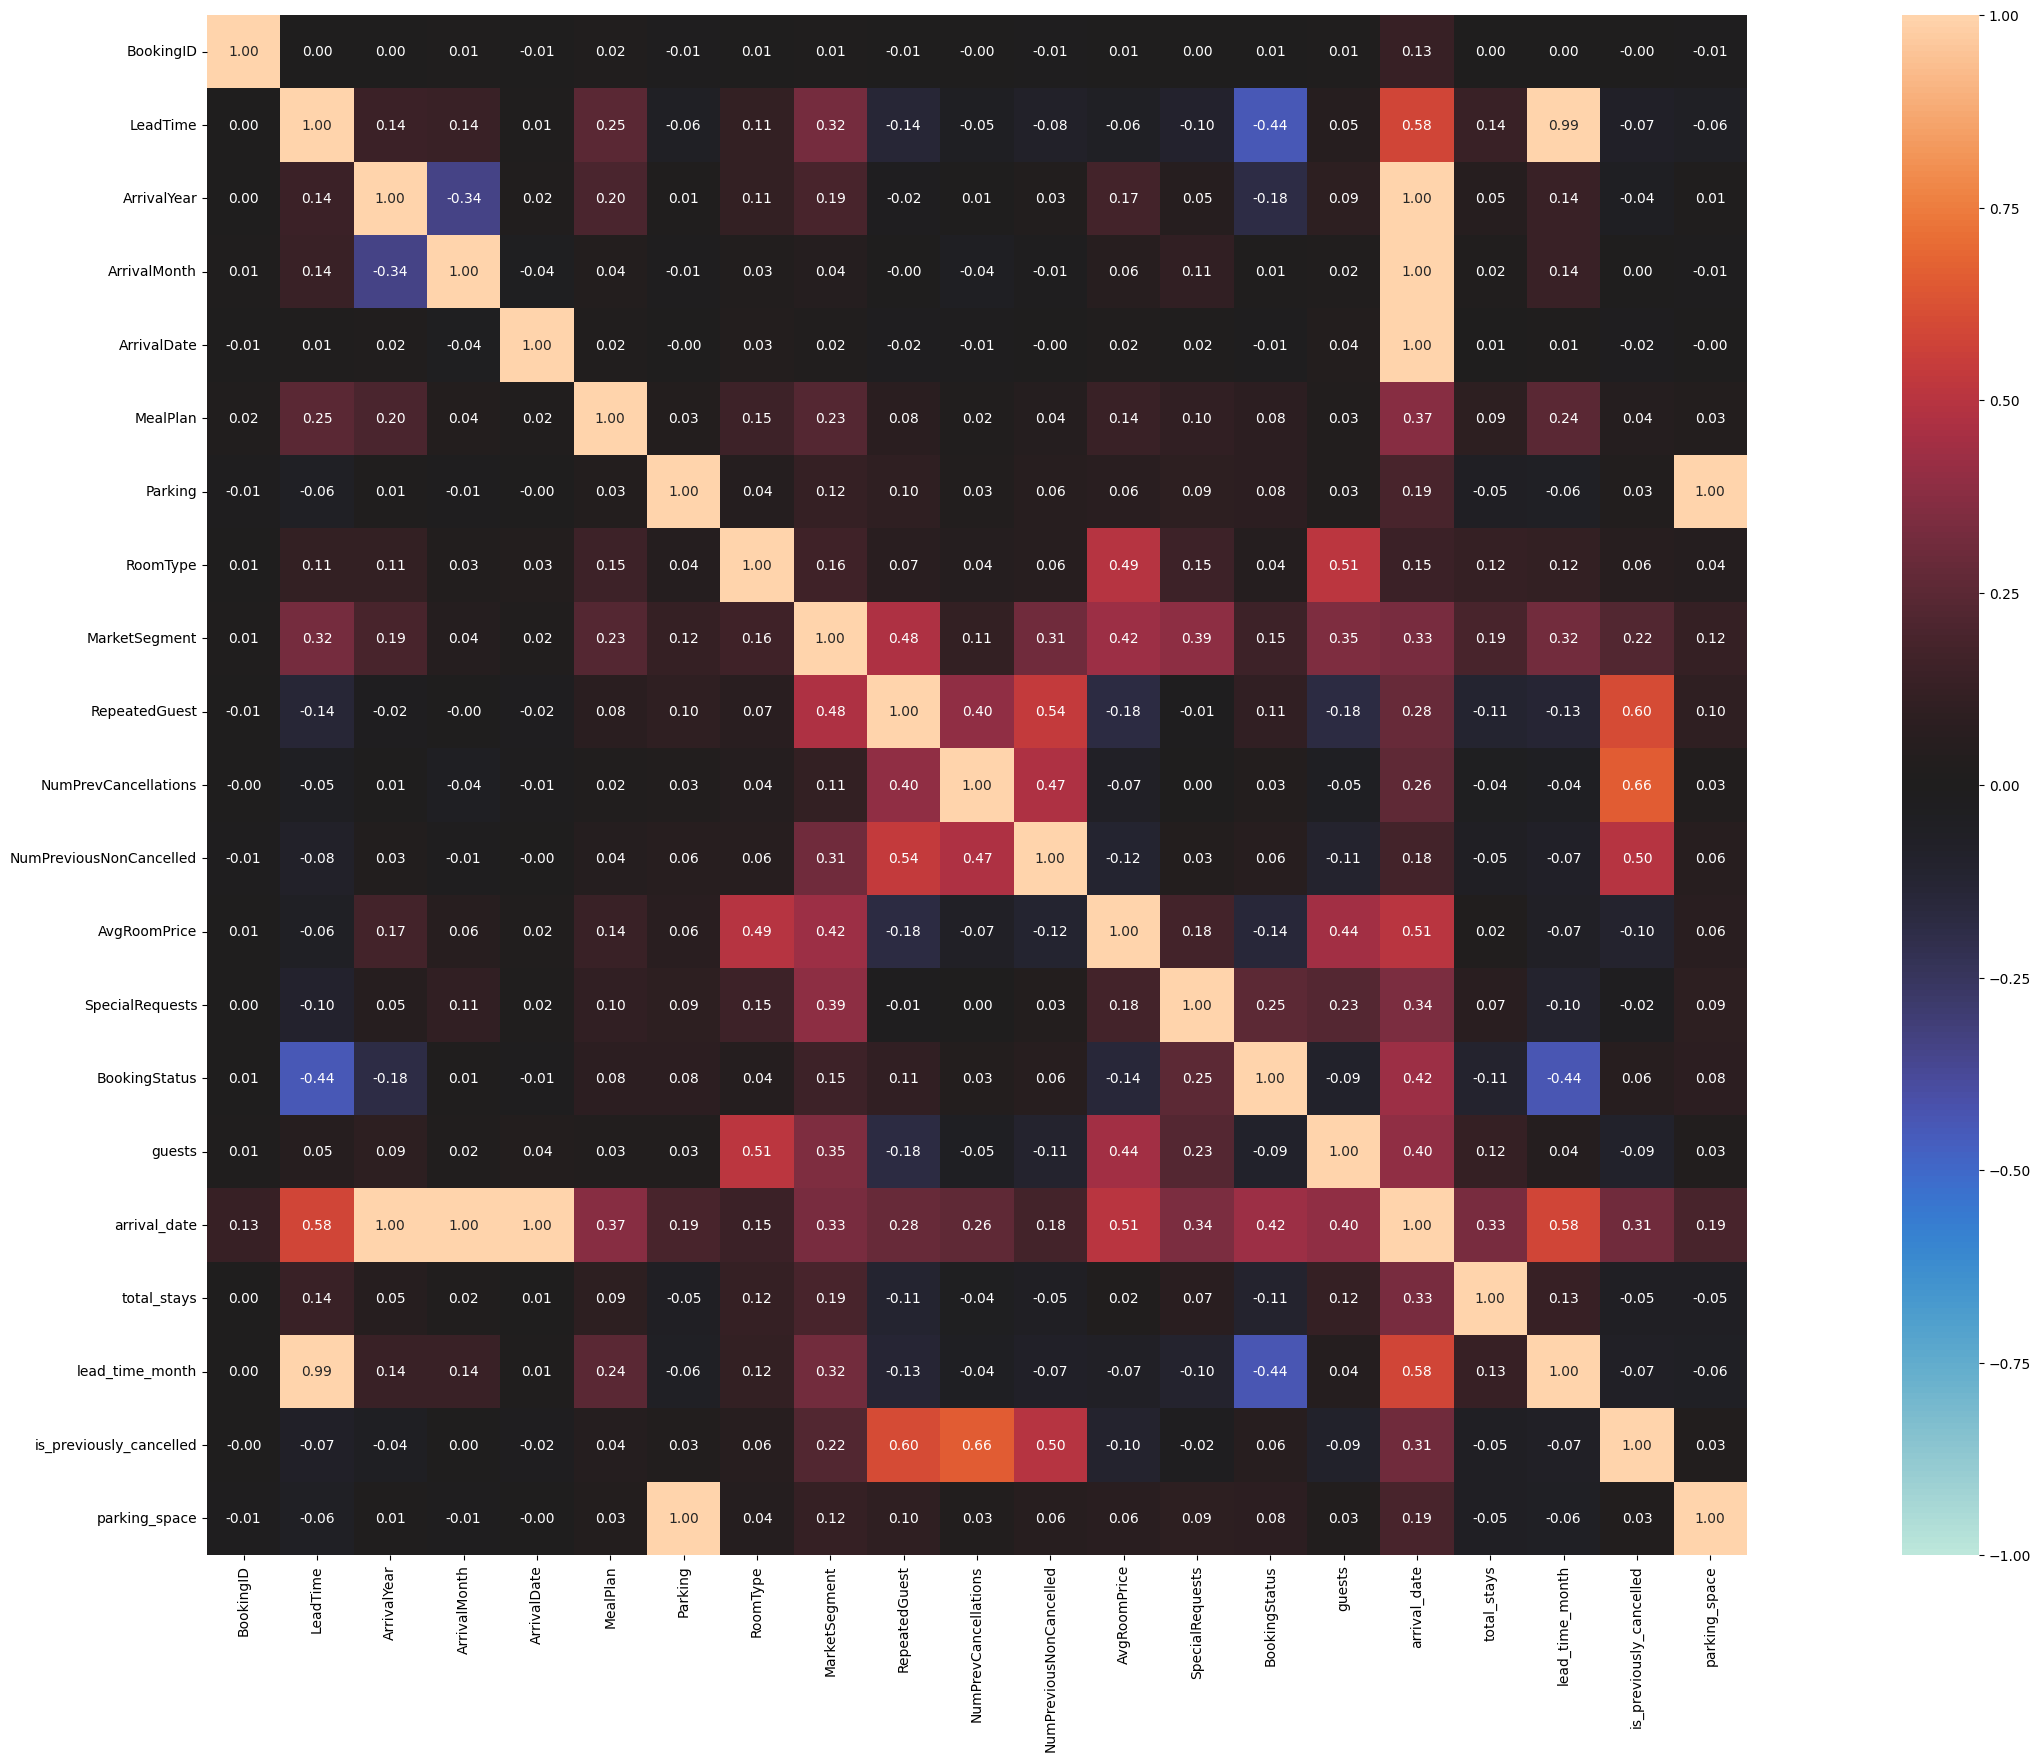

In [9]:
associations(df, figsize = (40, 20))
plt.show()

In [10]:
X = df[['BookingID','LeadTime', 'MarketSegment', 'Parking', 'SpecialRequests', 'NumPrevCancellations', 'RepeatedGuest', 'total_stays', 'guests']]
y = df['BookingStatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)   

In [11]:
X_train.head()

,BookingID,LeadTime,MarketSegment,Parking,SpecialRequests,NumPrevCancellations,RepeatedGuest,total_stays,guests
20756,20757,119,Online,0,0,0,0,7,2
2135,2136,8,Online,0,2,0,0,2,2
27139,27140,40,Offline,0,0,0,0,3,2
27112,27113,14,Online,0,1,0,0,1,1
2396,2397,141,Online,0,1,0,0,2,3


In [12]:
cat_columns = ['MarketSegment']
num_columns = ['BookingID','LeadTime', 'Parking', 'SpecialRequests', 'NumPrevCancellations', 'RepeatedGuest','total_stays','guests']

In [13]:
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

numerical_pipeline = Pipeline([
    ('scaler', RobustScaler())
])

prepocessor = ColumnTransformer([
    ('categorical',categorical_pipeline,cat_columns),
    ('numerical', numerical_pipeline,num_columns)
])

pipe_logreg = Pipeline([
    ("prep", prepocessor),
    ("algo", LogisticRegression())
])

pipe_KNN = Pipeline([
    ('prep', prepocessor),
    ('algo', KNeighborsClassifier())
])


pipe_RF = Pipeline([
    ("prep", prepocessor),
    ("algo", RandomForestClassifier())
])

pipe_DT = Pipeline([
    ("prep", prepocessor),
    ("algo", DecisionTreeClassifier())
])

pipe_XGB = Pipeline([
    ("prep", prepocessor),
    ("algo", XGBClassifier())
])


**Logistic Regression**

In [14]:
pipe_logreg.fit(X_train, y_train)
y_pred_logreg_base =  pipe_logreg.predict(X_test)
y_pred_logreg_base_train = pipe_logreg.predict(X_train)

In [15]:
recall_logreg_base = recall_score(y_test, y_pred_logreg_base)
acc_logreg_base = accuracy_score(y_test, y_pred_logreg_base)
precision_logreg_base = precision_score(y_test, y_pred_logreg_base)
f1_logreg_base = f1_score(y_test, y_pred_logreg_base)
acc_logreg_base_train = accuracy_score(y_train, y_pred_logreg_base_train)
print(f"Training Accuracy : {acc_logreg_base_train}")
print(f"Testing Accuracy : {acc_logreg_base}")

Training Accuracy : 0.7872587870434183
Testing Accuracy : 0.7860096485182633


In [16]:
print(classification_report(y_test, y_pred_logreg_base))

              precision    recall  f1-score   support

           0       0.73      0.56      0.63      1904
           1       0.81      0.90      0.85      3900

    accuracy                           0.79      5804
   macro avg       0.77      0.73      0.74      5804
weighted avg       0.78      0.79      0.78      5804



In [17]:
cm_logreg_base = confusion_matrix(y_test, y_pred_logreg_base, labels = [1,0])
df_logreg_base = pd.DataFrame(data = cm_logreg_base, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediction 0'])
df_logreg_base

,Prediction 1,Prediction 0
actual 1,3503,397
actual 0,845,1059


<Axes: >

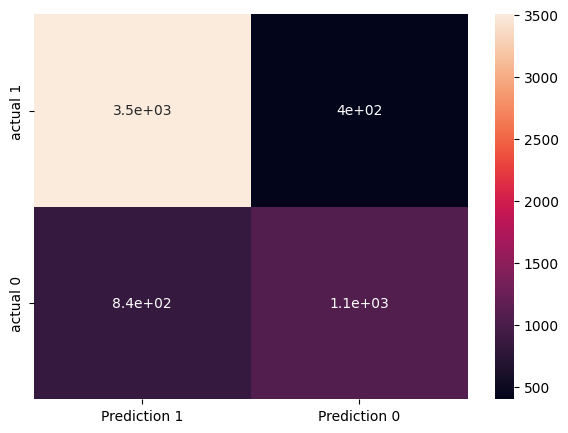

In [18]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_logreg_base, annot = True)

**KNN Algorithm**

In [19]:
pipe_KNN.fit(X_train, y_train)
y_pred_KNN_base =  pipe_KNN.predict(X_test)
y_pred_KNN_base_train = pipe_KNN.predict(X_train)

In [20]:
recall_KNN_base = recall_score(y_test, y_pred_KNN_base)
acc_KNN_base = accuracy_score(y_test, y_pred_KNN_base)
precision_KNN_base = precision_score(y_test, y_pred_KNN_base)
f1_KNN_base = f1_score(y_test, y_pred_KNN_base)
acc_KNN_base_train = accuracy_score(y_train, y_pred_KNN_base_train)

print(f"Training Accuracy : {acc_KNN_base_train}")
print(f"Testing Accuracy : {acc_KNN_base}")

Training Accuracy : 0.8585027567195038
Testing Accuracy : 0.8049620951068229


In [21]:
print(classification_report(y_test, y_pred_KNN_base))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69      1904
           1       0.84      0.88      0.86      3900

    accuracy                           0.80      5804
   macro avg       0.78      0.77      0.77      5804
weighted avg       0.80      0.80      0.80      5804



In [22]:
cm_KNN_base = confusion_matrix(y_test, y_pred_KNN_base, labels = [1,0])
df_KNN_base = pd.DataFrame(data = cm_KNN_base, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediction 0'])
df_KNN_base

,Prediction 1,Prediction 0
actual 1,3416,484
actual 0,648,1256


<Axes: >

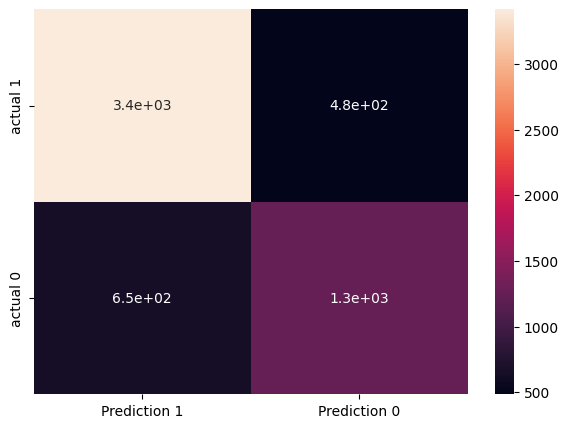

In [23]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_KNN_base, annot = True)

**Decision Tree**

In [24]:
pipe_DT.fit(X_train, y_train)
y_pred_DT_base =  pipe_DT.predict(X_test)
y_pred_DT_base_train = pipe_DT.predict(X_train)

In [25]:
recall_DT_base = recall_score(y_test, y_pred_DT_base)
acc_DT_base = accuracy_score(y_test, y_pred_DT_base)
precision_DT_base = precision_score(y_test, y_pred_DT_base)
f1_DT_base = f1_score(y_test, y_pred_DT_base)
acc_DT_base_train = accuracy_score(y_train, y_pred_DT_base_train)

print(f"Training Accuracy : {acc_DT_base_train}")
print(f"Testing Accuracy : {acc_DT_base}")

Training Accuracy : 1.0
Testing Accuracy : 0.7889386629910407


In [26]:
print(classification_report(y_test, y_pred_DT_base))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      1904
           1       0.85      0.84      0.84      3900

    accuracy                           0.79      5804
   macro avg       0.76      0.76      0.76      5804
weighted avg       0.79      0.79      0.79      5804



In [27]:
cm_DT_base = confusion_matrix(y_test, y_pred_DT_base, labels = [1,0])
df_DT_base = pd.DataFrame(data = cm_DT_base, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediction 0'])
df_DT_base

,Prediction 1,Prediction 0
actual 1,3269,631
actual 0,594,1310


<Axes: >

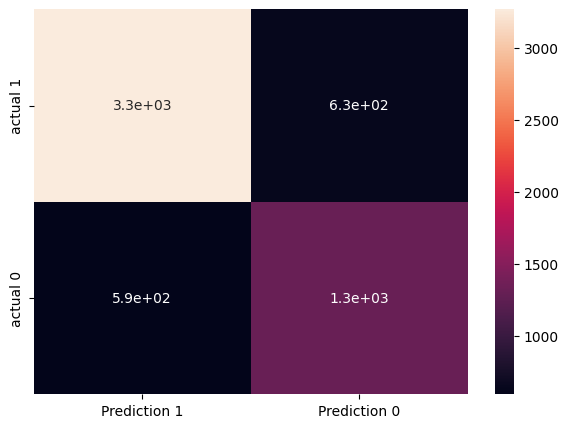

In [28]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_DT_base, annot = True)

**Random Forest**

In [29]:
pipe_RF.fit(X_train, y_train)
y_pred_RF_base =  pipe_RF.predict(X_test)
y_pred_RF_base_train = pipe_RF.predict(X_train)

In [30]:
recall_RF_base = recall_score(y_test, y_pred_RF_base)
acc_RF_base = accuracy_score(y_test, y_pred_RF_base)
precision_RF_base = precision_score(y_test, y_pred_RF_base)
f1_RF_base = f1_score(y_test, y_pred_RF_base)
acc_RF_base_train = accuracy_score(y_train, y_pred_RF_base_train)
print(f"Training Accuracy : {acc_RF_base_train}")
print(f"Testing Accuracy : {acc_RF_base}")

Training Accuracy : 1.0
Testing Accuracy : 0.8316678152997933


In [31]:
print(classification_report(y_test, y_pred_RF_base))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1904
           1       0.87      0.88      0.88      3900

    accuracy                           0.83      5804
   macro avg       0.81      0.81      0.81      5804
weighted avg       0.83      0.83      0.83      5804



In [32]:
cm_RF_base = confusion_matrix(y_test, y_pred_RF_base, labels = [1,0])
df_RF_base = pd.DataFrame(data = cm_RF_base, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediksi 0'])
df_RF_base

,Prediction 1,Prediksi 0
actual 1,3435,465
actual 0,512,1392


<Axes: >

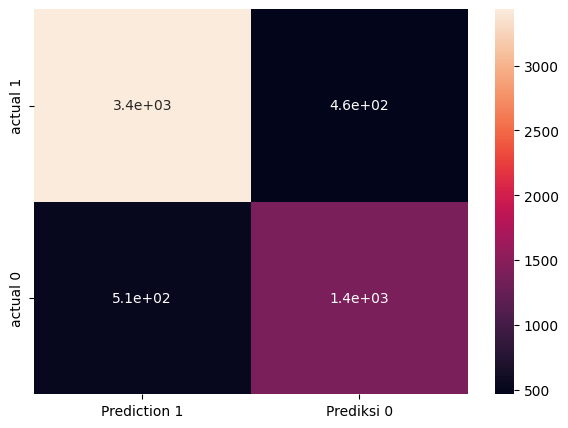

In [33]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_RF_base, annot = True)

**XGB Algorithm**

In [34]:
pipe_XGB.fit(X_train, y_train)
y_pred_XGB_base =  pipe_XGB.predict(X_test)
y_pred_XGB_base_train = pipe_XGB.predict(X_train)

In [35]:
recall_XGB_base = recall_score(y_test, y_pred_XGB_base)
acc_XGB_base = accuracy_score(y_test, y_pred_XGB_base)
precision_XGB_base = precision_score(y_test, y_pred_XGB_base)
f1_XGB_base = f1_score(y_test, y_pred_XGB_base)
acc_XGB_base_train = accuracy_score(y_train, y_pred_XGB_base_train)
print(f"Training Accuracy : {acc_XGB_base_train}")
print(f"Testing Accuracy : {acc_XGB_base}")

Training Accuracy : 0.874052377670572
Testing Accuracy : 0.8383873190902825


In [36]:
print(classification_report(y_test, y_pred_XGB_base))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1904
           1       0.87      0.90      0.88      3900

    accuracy                           0.84      5804
   macro avg       0.82      0.81      0.81      5804
weighted avg       0.84      0.84      0.84      5804



In [37]:
cm_XGB_base = confusion_matrix(y_test, y_pred_XGB_base, labels = [1,0])
df_XGB_base = pd.DataFrame(data = cm_XGB_base, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediksi 0'])
df_XGB_base

,Prediction 1,Prediksi 0
actual 1,3503,397
actual 0,541,1363


<Axes: >

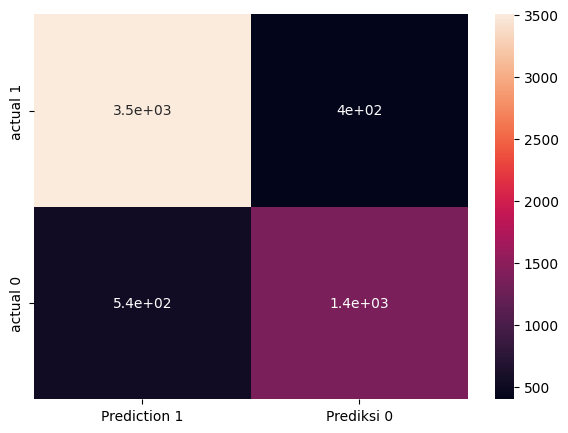

In [38]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_XGB_base, annot = True)

In [39]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [40]:
evaluation_matrix_base = {
    'Logistic Regression': [acc_logreg_base, recall_logreg_base, precision_logreg_base, f1_logreg_base],
    'KNN':[acc_KNN_base,recall_KNN_base,precision_KNN_base, f1_KNN_base],
    'Decision Tree':[acc_DT_base, recall_DT_base, precision_DT_base, f1_DT_base],
    'Random Forest':[acc_RF_base, recall_RF_base, precision_RF_base, f1_RF_base],
    'XGB':[acc_XGB_base, recall_XGB_base, precision_XGB_base, f1_XGB_base]
}

eva_base = pd.DataFrame(data = evaluation_matrix_base, index = ['Accucary', 'Recall', 'Precision', 'F1 Score'])

evaluation_matrix_base_training = {
    "training" : [acc_logreg_base_train, acc_KNN_base_train, acc_DT_base_train, acc_RF_base_train, acc_XGB_base_train],
    "testing": [acc_logreg_base, acc_KNN_base, acc_DT_base, acc_RF_base, acc_XGB_base]
}
    

eva_base_train = pd.DataFrame(data = evaluation_matrix_base_training, index = ['Logreg', 'KNN', 'Decision Tree', 'Random Forest', 'XGB'])

display_side_by_side([eva_base, eva_base_train], ['Evaluation Matrix', 'Accuracy Train & Test'])

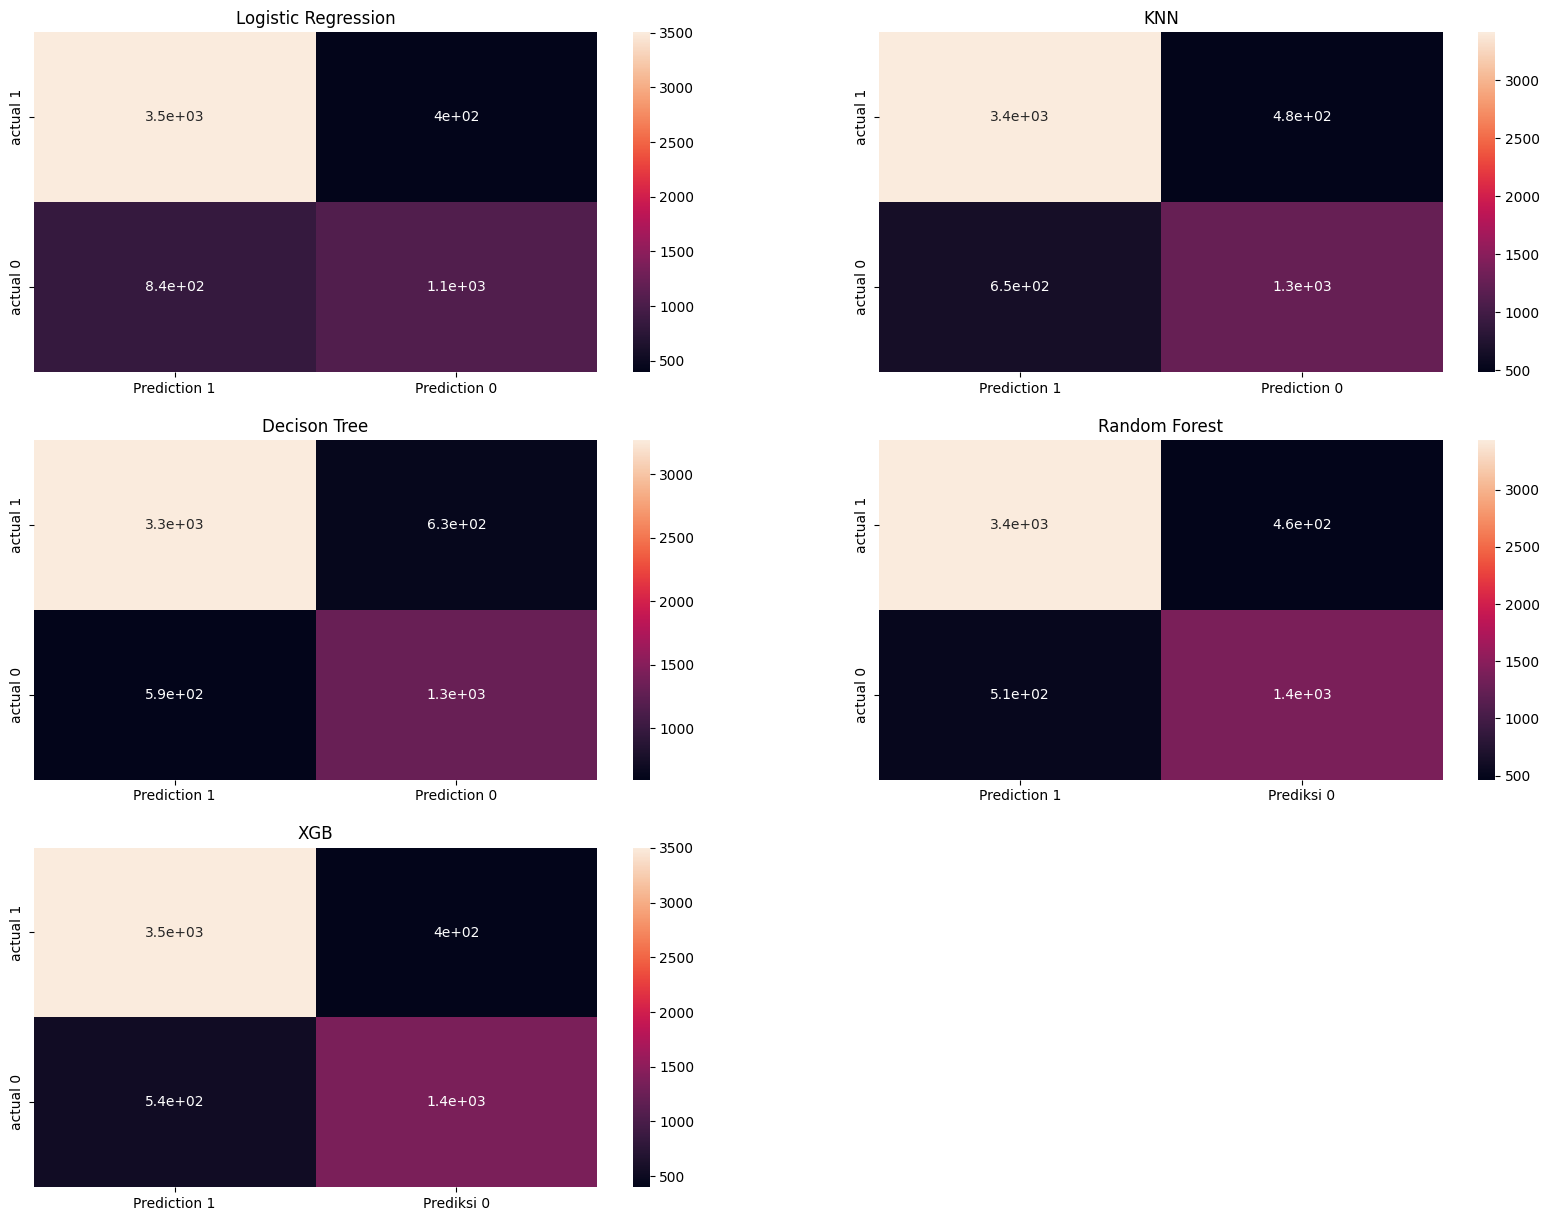

In [41]:
plt.figure(figsize = (20, 15))

plt.subplot(3,2,1)
sns.heatmap(df_logreg_base, annot=True)
plt.title("Logistic Regression")

plt.subplot(3,2,2)
sns.heatmap(df_KNN_base, annot = True)
plt.title('KNN')

plt.subplot(3,2,3)
sns.heatmap(df_DT_base, annot = True)
plt.title('Decison Tree')

plt.subplot(3,2,4)
sns.heatmap(df_RF_base, annot = True)
plt.title('Random Forest')

plt.subplot(3,2,5)
sns.heatmap(df_XGB_base, annot = True)
plt.title("XGB")

plt.show()

In [42]:
data_arif = {
    "nama" : "Arif",
    "Sex" : "male",
    "Age" : 28,
    "BookingID" : 1,
    "LeadTime" : 200,
    "MarketSegment" : "Corporate",
    'Parking':1,
    'SpecialRequests':1,
    'NumPrevCancellations':1,
    'RepeatedGuest':0,
    'total_stays': 2,
    'guests': 2,
    "Email" : "arif@titanic.com"
}

arif = pd.DataFrame(data = data_arif, index = [1])
pipe_XGB.predict_proba(arif)

array([[0.90547705, 0.09452298]], dtype=float32)

**Importing Pytorch from DeterminedAI:-**By allowing customers to design unique reducers, Determined facilitates proper reduction of arbitrary training and validation metrics, even during distributed training. Custom reducers may implement the determined or be a function of it.

In [43]:
import torch.nn as nn
from determined.pytorch import DataLoader, PyTorchTrial, PyTorchTrialContext

class HotelBookingcancellation(PyTorchTrial):
    def __init__(self, context: PyTorchTrialContext):
        # Initialize the trial class and wrap the models, optimizers, and LR schedulers.
        pass

    def train_batch(self, batch: data_arif, epoch_idx: int, batch_idx: int):
        # Run forward passes on the models and backward passes on the optimizers.
        pass

    def evaluate_batch(self, batch: data_arif):
        # Define how to evaluate the model by calculating loss and other metrics
        # for a batch of validation data.
        pass

    def build_training_data_loader(self):
        # Create the training data loader.
        # This should return a determined.pytorch.Dataset.
        pass

    def build_validation_data_loader(self):
        # Create the validation data loader.
        # This should return a determined.pytorch.Dataset.
        pass

The __init__ method is used to create our trial class, just like it is with any other Python class. One instance of PyTorchTrialContext, a class that derives from TrialContext, is the only parameter that Determined provides to this method. Information regarding the trial, such as the values of the hyperparameters to be used for training, is contained in the trial context. All models and optimizers need to be wrapped using the wrap_model and wrap_optimizer functions provided by PyTorchTrialContext, respectively.


In [45]:
def __init__(self, context: PyTorchTrialContext):
    # Store trial context for later use.
    self.context = context

    # Create a unique download directory for each rank so they don't overwrite each
    # other when doing distributed training.
    self.download_directory = f"/tmp/data-rank{self.context.distributed.get_rank()}"
    self.data_downloaded = False

    # Initialize the model and wrap it using self.context.wrap_model().
    self.model = self.context.wrap_model(
        nn.Sequential(
            nn.Conv2d(1, self.context.get_hparam("n_filters1"), 3, 1),
            nn.ReLU(),
            nn.Conv2d(
                self.context.get_hparam("n_filters1"),
                self.context.get_hparam("n_filters2"),
                3,
            ),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout2d(self.context.get_hparam("dropout1")),
            Flatten(),
            nn.Linear(144 * self.context.get_hparam("n_filters2"), 128),
            nn.ReLU(),
            nn.Dropout2d(self.context.get_hparam("dropout2")),
            nn.Linear(128, 10),
            nn.LogSoftmax(),
        )
    )

    # Initialize the optimizer and wrap it using self.context.wrap_optimizer().
    self.optimizer = self.context.wrap_optimizer(
        torch.optim.Adadelta(
            model.parameters(), lr=self.context.get_hparam("learning_rate")
        )
    )

**Build_Training_Data_Loader** and **Build_Validation_Data_Loader** are the following two methods that need to be defined. These techniques are used by Determined to load the training dataset and the validation dataset, respectively. Both techniques ought to produce a determined.Torch.utils.data.DataLoader and **pytorch.DataLoader** are extremely similar.



In [46]:
def build_training_data_loader(self):
    if not self.data_downloaded:
        self.download_directory = data.download_dataset(
            download_directory=self.download_directory,
            data_config=self.context.get_data_config(),
        )
        self.data_downloaded = True

    train_data = data.get_dataset(self.download_directory, train=True)
    return DataLoader(train_data, batch_size=self.context.get_per_slot_batch_size())


def build_validation_data_loader(self):
    if not self.data_downloaded:
        self.download_directory = data.download_dataset(
            download_directory=self.download_directory,
            data_config=self.context.get_data_config(),
        )
        self.data_downloaded = True

    validation_data = data.get_dataset(self.download_directory, train=False)
    return DataLoader(
        validation_data, batch_size=self.context.get_per_slot_batch_size()
    )

A single batch of data from the training data set is supplied to the train_batch() method, which is supposed to perform the forward passes on the models, the reverse passes on the losses, and step the optimizers. A dictionary with user-defined training measures should be returned by this function; **Determined will automatically average all the metrics over batches. There is no need to execute optim.zero_grad() if an optimizer is configured to automatically handle zeroing out the gradients; step_optimizer will take care of this for you.**


In [47]:
def train_batch(self, batch: data_arif, epoch_idx: int, batch_idx: int):
    batch = cast(Tuple[torch.Tensor, torch.Tensor], batch)
    data, labels = batch

    # Define the training forward pass and calculate loss.
    output = self.model(data)
    loss = torch.nn.functional.nll_loss(output, labels)

    # Define the training backward pass and step the optimizer.
    self.context.backward(loss)
    self.context.step_optimizer(self.optimizer)

    return {"loss": loss}

A single batch of data from the validation data set is passed to the evaluate_batch() method, which must compute the user-defined validation metrics on the data and return them as a dictionary that links metric names to values. To create a single value of each metric for the full validation set, the metric values for each batch are reduced (aggregated). Metric values are averaged by default, however you can change this behaviour by overriding evaluation_reducer().

In [49]:
def evaluate_batch(self, batch: data_arif):
    batch = cast(Tuple[torch.Tensor, torch.Tensor], batch)
    data, labels = batch

    output = self.model(data)
    validation_loss = torch.nn.functional.nll_loss(output, labels).item()

    pred = output.argmax(dim=1, keepdim=True)
    accuracy = pred.eq(labels.view_as(pred)).sum().item() / len(data)

    return {"validation_loss": validation_loss, "accuracy": accuracy}

We can use **Determined** to train a single instance of the model or to conduct a hyperparameter search now that we have migrated our model code to the trial API. A trial in Determined is a training task that includes a dataset, a deep learning model, and values for every model hyperparameter.


In [54]:
train_model=["name: data_arif",
             "url: https://s3-us-west-2.amazonaws.com/determined-ai-test-data/pytorch_mnist.tar.gz",
             "learning_rate: 1.0",
             "global_batch_size: 64",
             "n_filters1: 32",
             "n_filters2: 64",
             "dropout1: 0.25",
             "dropout2: 0.5",
             "records_per_epoch: 50_000",
             "name: single",
             "metric: validation_loss",
             "epochs: 1",
             "smaller_is_better: true",
             "entrypoint: model_def:HotelBookingTrial"]

The name of the trial class to utilise is specified in the entrypoint. If the model code has multiple trial classes, this is helpful. Because our trial class is called **HotelBooking**, we utilise an entrypoint of **model_def:HotelBookingTrial** in this instance.


Determined automatically evaluates models for me. Simply go to the WebUI by inputting the **Determined master's address** in your web browser to access information on training and validation performance.


**Hyperparameter tuning**

**Automated model tuning using Determined:-** Use a number of search algorithms, including our adaptive search, to optimise models by looking through common hyperparameters or macro-architectures. The accelerators in your cluster are automatically parallelized for hyperparameter searches.


In [55]:
pipe_logreg.get_params()

{'memory': None,
 'steps': [('prep',
   ColumnTransformer(transformers=[('categorical',
                                    Pipeline(steps=[('encoder', OneHotEncoder())]),
                                    ['MarketSegment']),
                                   ('numerical',
                                    Pipeline(steps=[('scaler', RobustScaler())]),
                                    ['BookingID', 'LeadTime', 'Parking',
                                     'SpecialRequests', 'NumPrevCancellations',
                                     'RepeatedGuest', 'total_stays', 'guests'])])),
  ('algo', LogisticRegression())],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('categorical',
                                  Pipeline(steps=[('encoder', OneHotEncoder())]),
                                  ['MarketSegment']),
                                 ('numerical',
                                  Pipeline(steps=[('scaler', RobustScaler())]),
                              

In [56]:
param_logreg = {
    'algo__penalty':['l2', 'l1', 'elasticnet'],
    'algo__C':[1.0, 2.0, 3.0, 0.5, 0.1],
    'algo__class_weight':[None, 'balanced']
}

model_logreg = GridSearchCV(estimator=pipe_logreg, param_grid=param_logreg, cv = 3, n_jobs = -1, verbose = 1, scoring='accuracy')
model_logreg.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['MarketSegment']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['BookingID',
                                                                          'LeadTime',
                                                                          'Parking',
                                                                          'SpecialRequests',
                                                                          'NumPrevCancellations',
                                                                          'RepeatedGuest',
                                                                          'total_stays',
                                                                          'guests'])])),
                                       ('algo', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'algo__C': [1.0, 2.0, 3.0, 0.5, 0.1],
                         'algo__class_weight': [None, 'balanced'],
                         'algo__penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy', verbose=1)

In [57]:
logreg_tuned = model_logreg.best_estimator_
logreg_tuned_train = model_logreg.best_score_
y_pred_logreg_tuned = logreg_tuned.predict(X_test)

In [58]:
recall_logreg_tuned = recall_score(y_test, y_pred_logreg_tuned)
acc_logreg_tuned = accuracy_score(y_test, y_pred_logreg_tuned)
precision_logreg_tuned = precision_score(y_test, y_pred_logreg_tuned)
f1_logreg_tuned = f1_score(y_test, y_pred_logreg_tuned)
acc_logreg_tuned_train = logreg_tuned_train

print(f"Training Accuracy : {acc_logreg_tuned_train}")
print(f"Testing Accuracy : {acc_logreg_tuned}")

Training Accuracy : 0.7872588827361809
Testing Accuracy : 0.7860096485182633


In [59]:
print(classification_report(y_test, y_pred_logreg_tuned))

              precision    recall  f1-score   support

           0       0.73      0.56      0.63      1904
           1       0.81      0.90      0.85      3900

    accuracy                           0.79      5804
   macro avg       0.77      0.73      0.74      5804
weighted avg       0.78      0.79      0.78      5804



In [61]:
cm_logreg_tuned = confusion_matrix(y_test, y_pred_logreg_tuned, labels = [1,0])
df_logreg_tuned = pd.DataFrame(data = cm_logreg_tuned, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediction 0'])
display_side_by_side([df_logreg_base, df_logreg_tuned], ['Base Model', 'Tuned Model'])

,Prediction 1,Prediction 0
actual 1,3503,397
actual 0,845,1059
,Prediction 1,Prediction 0
actual 1,3503,397
actual 0,845,1059


Text(0.5, 1.0, 'Tuned Model')

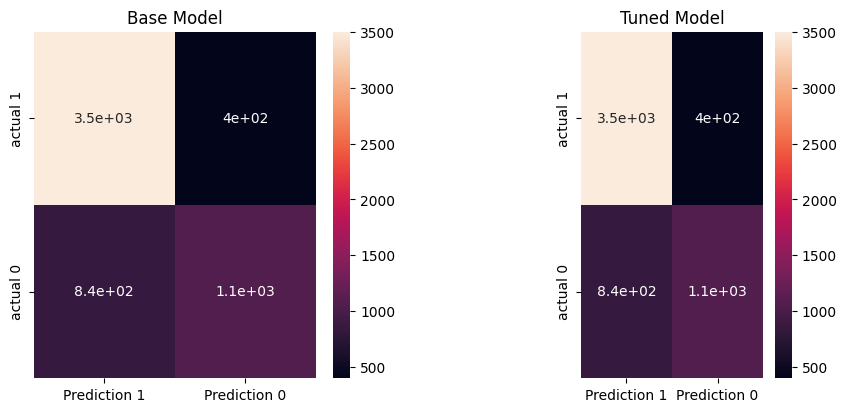

In [62]:
plt.figure(figsize = (10, 4.5))

plt.subplot(1,2,1)
sns.heatmap(df_logreg_base, annot = True)
plt.title('Base Model')

plt.subplot(1,3,3)
sns.heatmap(df_logreg_tuned, annot = True)
plt.title('Tuned Model')

In [63]:
pipe_KNN.get_params()

{'memory': None,
 'steps': [('prep',
   ColumnTransformer(transformers=[('categorical',
                                    Pipeline(steps=[('encoder', OneHotEncoder())]),
                                    ['MarketSegment']),
                                   ('numerical',
                                    Pipeline(steps=[('scaler', RobustScaler())]),
                                    ['BookingID', 'LeadTime', 'Parking',
                                     'SpecialRequests', 'NumPrevCancellations',
                                     'RepeatedGuest', 'total_stays', 'guests'])])),
  ('algo', KNeighborsClassifier())],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('categorical',
                                  Pipeline(steps=[('encoder', OneHotEncoder())]),
                                  ['MarketSegment']),
                                 ('numerical',
                                  Pipeline(steps=[('scaler', RobustScaler())]),
                            

In [64]:
param_KNN = {
    'algo__n_neighbors': [5, 10, 15, 20, 30, 40],
    'algo__weights':['uniform', 'distance'],
    'algo__p':[2,1]
}

model_KNN = GridSearchCV(estimator=pipe_KNN, param_grid=param_KNN, cv = 3, n_jobs = -1, verbose = 1)
model_KNN.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['MarketSegment']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['BookingID',
                                                                          'LeadTime',
                                                                          'Parking',
                                                                          'SpecialRequests',
                                                                          'NumPrevCancellations',
                                                                          'RepeatedGuest',
                                                                          'total_stays',
                                                                          'guests'])])),
                                       ('algo', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'algo__n_neighbors': [5, 10, 15, 20, 30, 40],
                         'algo__p': [2, 1],
                         'algo__weights': ['uniform', 'distance']},
             verbose=1)

In [65]:
KNN_tuned = model_KNN.best_estimator_
KNN_tuned_train = model_KNN.best_score_
y_pred_KNN_tuned = KNN_tuned.predict(X_test)

In [66]:
recall_KNN_tuned = recall_score(y_test, y_pred_KNN_tuned)
acc_KNN_tuned = accuracy_score(y_test, y_pred_KNN_tuned)
precision_KNN_tuned = precision_score(y_test, y_pred_KNN_tuned)
f1_KNN_tuned = f1_score(y_test, y_pred_KNN_tuned)
acc_KNN_tuned_train = KNN_tuned_train

print(f"Training Accuracy : {acc_KNN_tuned_train}")
print(f"Testing Accuracy : {acc_KNN_tuned}")

Training Accuracy : 0.816548968198976
Testing Accuracy : 0.8220192970365265


In [67]:
print(classification_report(y_test, y_pred_KNN_tuned))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1904
           1       0.85      0.89      0.87      3900

    accuracy                           0.82      5804
   macro avg       0.80      0.78      0.79      5804
weighted avg       0.82      0.82      0.82      5804



In [68]:
cm_KNN_tuned = confusion_matrix(y_test, y_pred_KNN_tuned, labels = [1,0])
df_KNN_tuned = pd.DataFrame(data = cm_KNN_tuned, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediksi 0'])
display_side_by_side([df_KNN_base, df_KNN_tuned], ['Base Model', 'Tuned Model'])

,Prediction 1,Prediction 0
actual 1,3416,484
actual 0,648,1256
,Prediction 1,Prediksi 0
actual 1,3487,413
actual 0,620,1284


Text(0.5, 1.0, 'Tuned Model')

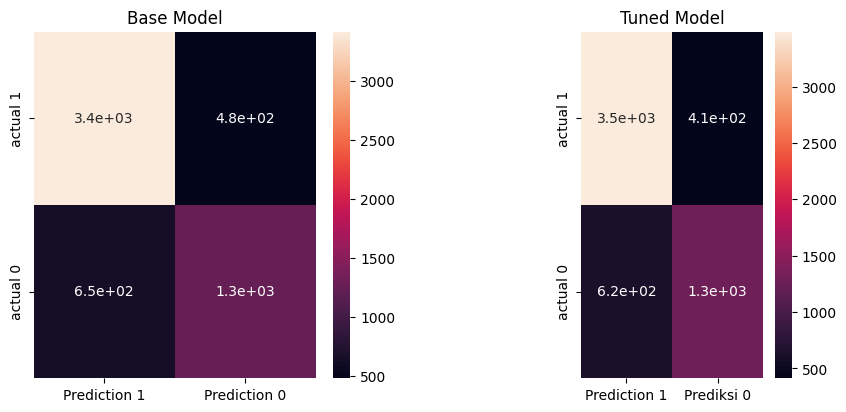

In [69]:
plt.figure(figsize = (10, 4.5))

plt.subplot(1,2,1)
sns.heatmap(df_KNN_base, annot = True)
plt.title('Base Model')

plt.subplot(1,3,3)
sns.heatmap(df_KNN_tuned, annot = True)
plt.title('Tuned Model')

In [70]:
param_DT = {
    'algo__min_samples_split': [2,1,3,4,6,8,10,],
    'algo__max_depth': [None,1,2,4,8,10,12,14,18, 20],
    'algo__min_samples_leaf':[1,2,4,5,8]
}

model_DT = GridSearchCV(estimator=pipe_DT, param_grid=param_DT, cv = 3, n_jobs = -1, verbose = 1, scoring='accuracy')
model_DT.fit(X_train, y_train)

Fitting 3 folds for each of 350 candidates, totalling 1050 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['MarketSegment']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['BookingID',
                                                                          'LeadTime',
                                                                          'Parking',
                                                                          'SpecialRequests',
                                                                          'NumPrevCancellations',
                                                                          'RepeatedGuest',
                                                                          'total_stays',
                                                                          'guests'])])),
                                       ('algo', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'algo__max_depth': [None, 1, 2, 4, 8, 10, 12, 14, 18,
                                             20],
                         'algo__min_samples_leaf': [1, 2, 4, 5, 8],
                         'algo__min_samples_split': [2, 1, 3, 4, 6, 8, 10]},
             scoring='accuracy', verbose=1)

In [71]:
DT_tuned = model_DT.best_estimator_
DT_tuned_train = model_DT.best_score_
y_pred_DT_tuned = DT_tuned.predict(X_test)

In [72]:
recall_DT_tuned = recall_score(y_test, y_pred_DT_tuned)
acc_DT_tuned = accuracy_score(y_test, y_pred_DT_tuned)
precision_DT_tuned = precision_score(y_test, y_pred_DT_tuned)
f1_DT_tuned = f1_score(y_test, y_pred_DT_tuned)
acc_DT_tuned_train = DT_tuned_train

print(f"Training Accuracy : {acc_DT_tuned_train}")
print(f"Testing Accuracy : {acc_DT_tuned}")

Training Accuracy : 0.8270159710979957
Testing Accuracy : 0.8335630599586492


In [73]:
print(classification_report(y_test, y_pred_DT_tuned))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1904
           1       0.87      0.88      0.88      3900

    accuracy                           0.83      5804
   macro avg       0.81      0.81      0.81      5804
weighted avg       0.83      0.83      0.83      5804



In [74]:
cm_DT_tuned = confusion_matrix(y_test, y_pred_DT_tuned, labels = [1,0])
df_DT_tuned = pd.DataFrame(data = cm_DT_tuned, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediction 0'])
display_side_by_side([df_DT_base, df_DT_tuned], ['Base Model', 'Tuned Model'])

,Prediction 1,Prediction 0
actual 1,3269,631
actual 0,594,1310
,Prediction 1,Prediction 0
actual 1,3439,461
actual 0,505,1399


Text(0.5, 1.0, 'Tuned Model')

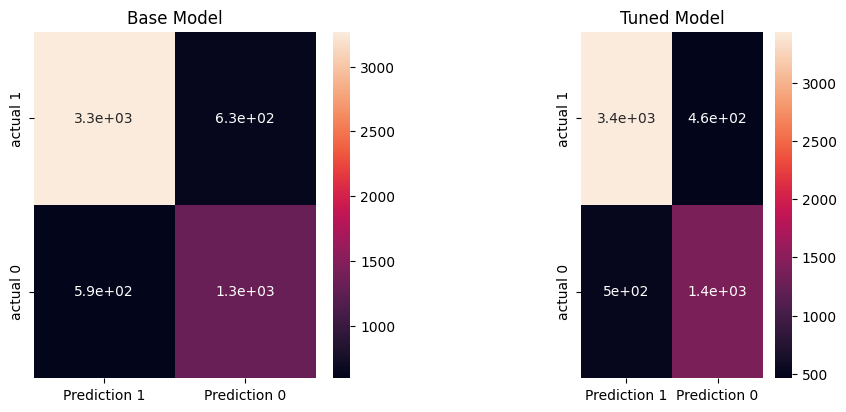

In [75]:
plt.figure(figsize = (10, 4.5))

plt.subplot(1,2,1)
sns.heatmap(df_DT_base, annot = True)
plt.title('Base Model')

plt.subplot(1,3,3)
sns.heatmap(df_DT_tuned, annot = True)
plt.title('Tuned Model')

In [78]:
param_RF = {
    'algo__min_samples_split': [2,3,4,6,8,10],
    'algo__max_depth': [None,12,14,18, 20],
    'algo__min_samples_leaf':[1,2,4,8],
    'algo__max_leaf_nodes':[None, 1,2,4]
}

model_RF = GridSearchCV(estimator=pipe_RF, param_grid=param_RF, cv = 3, n_jobs = -1, verbose = 1, scoring='accuracy')
model_RF.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['MarketSegment']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['BookingID',
                                                                          'LeadTime',
                                                                          'Parking',
                                                                          'SpecialRequests',
                                                                          'NumPrevCancellations',
                                                                          'RepeatedGuest',
                                                                          'total_stays',
                                                                          'guests'])])),
                                       ('algo', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'algo__max_depth': [None, 12, 14, 18, 20],
                         'algo__max_leaf_nodes': [None, 1, 2, 4],
                         'algo__min_samples_leaf': [1, 2, 4, 8],
                         'algo__min_samples_split': [2, 3, 4, 6, 8, 10]},
             scoring='accuracy', verbose=1)

In [79]:
RF_tuned = model_RF.best_estimator_
RF_tuned_train = model_RF.best_score_
y_pred_RF_tuned = RF_tuned.predict(X_test) 

In [80]:
recall_RF_tuned = recall_score(y_test, y_pred_RF_tuned)
acc_RF_tuned = accuracy_score(y_test, y_pred_RF_tuned)
precision_RF_tuned = precision_score(y_test, y_pred_RF_tuned)
f1_RF_tuned = f1_score(y_test, y_pred_RF_tuned)
acc_RF_tuned_train = RF_tuned_train

print(f"Training Accuracy : {acc_RF_tuned_train}")
print(f"Testing Accuracy : {acc_RF_tuned}")

Training Accuracy : 0.8370520658736474
Testing Accuracy : 0.8406271536871124


In [81]:
print(classification_report(y_test, y_pred_RF_tuned))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1904
           1       0.87      0.90      0.88      3900

    accuracy                           0.84      5804
   macro avg       0.82      0.81      0.82      5804
weighted avg       0.84      0.84      0.84      5804



In [82]:
cm_RF_tuned = confusion_matrix(y_test, y_pred_RF_tuned, labels = [1,0])
df_RF_tuned = pd.DataFrame(data = cm_RF_tuned, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediction 0'])
display_side_by_side([df_RF_base, df_RF_tuned], ['Base Model', 'Tuned Model'])

,Prediction 1,Prediksi 0
actual 1,3435,465
actual 0,512,1392
,Prediction 1,Prediction 0
actual 1,3497,403
actual 0,522,1382


Text(0.5, 1.0, 'Tuned Model')

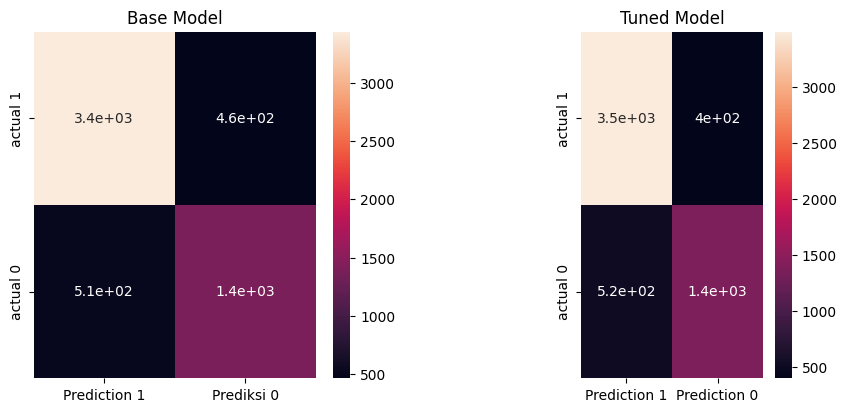

In [83]:
plt.figure(figsize = (10, 4.5))

plt.subplot(1,2,1)
sns.heatmap(df_RF_base, annot = True)
plt.title('Base Model')

plt.subplot(1,3,3)
sns.heatmap(df_RF_tuned, annot = True)
plt.title('Tuned Model')

In [84]:
pipe_XGB.get_params()

{'memory': None,
 'steps': [('prep',
   ColumnTransformer(transformers=[('categorical',
                                    Pipeline(steps=[('encoder', OneHotEncoder())]),
                                    ['MarketSegment']),
                                   ('numerical',
                                    Pipeline(steps=[('scaler', RobustScaler())]),
                                    ['BookingID', 'LeadTime', 'Parking',
                                     'SpecialRequests', 'NumPrevCancellations',
                                     'RepeatedGuest', 'total_stays', 'guests'])])),
  ('algo',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                 interaction_const

In [85]:
param_XGB = {
    'algo__learning_rate': [0.300000012, 0.5, 0.7, 0.8],
    'algo__max_depth': [6, 8, 10, 12],
    'algo__gamma':[0,1,2,3]
}

model_XGB = GridSearchCV(estimator=pipe_XGB, param_grid=param_XGB, cv = 3, n_jobs = -1, verbose = 1, scoring='accuracy')
model_XGB.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['MarketSegment']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['BookingID',
                                                                          'LeadTime',
                                                                          'Parking',
                                                                          'SpecialRequests',
                                                                          'NumPrevCancellations',
                                                                          'RepeatedGuest',
                                                                          'total_stays',
                                                                          'guests'])])),
                                       ('algo',
                                        XG...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'algo__gamma': [0, 1, 2, 3],
                         'algo__learning_rate': [0.300000012, 0.5, 0.7, 0.8],
                         'algo__max_depth': [6, 8, 10, 12]},
             scoring='accuracy', verbose=1)

In [86]:
XGB_tuned = model_XGB.best_estimator_
XGB_tuned_train = model_XGB.best_score_
y_pred_XGB_tuned = XGB_tuned.predict(X_test)

In [87]:
recall_XGB_tuned = recall_score(y_test, y_pred_XGB_tuned)
acc_XGB_tuned = accuracy_score(y_test, y_pred_XGB_tuned)
precision_XGB_tuned = precision_score(y_test, y_pred_XGB_tuned)
f1_XGB_tuned = f1_score(y_test, y_pred_XGB_tuned)
acc_XGB_tuned_train = XGB_tuned_train

print(f"Training Accuracy : {acc_XGB_tuned_train}")
print(f"Testing Accuracy : {acc_XGB_tuned}")

Training Accuracy : 0.8365351586996423
Testing Accuracy : 0.8445899379738112


In [88]:
print(classification_report(y_test, y_pred_XGB_tuned))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1904
           1       0.87      0.90      0.89      3900

    accuracy                           0.84      5804
   macro avg       0.83      0.81      0.82      5804
weighted avg       0.84      0.84      0.84      5804



In [89]:
cm_XGB_tuned = confusion_matrix(y_test, y_pred_XGB_tuned, labels = [1,0])
df_XGB_tuned = pd.DataFrame(data = cm_XGB_tuned, index = ['actual 1', 'actual 0'], columns = ['Prediction 1', 'Prediction 0'])


display_side_by_side([df_XGB_base, df_XGB_tuned], ['Base Model', 'Tuned Model'])

,Prediction 1,Prediksi 0
actual 1,3503,397
actual 0,541,1363
,Prediction 1,Prediction 0
actual 1,3515,385
actual 0,517,1387


Text(0.5, 1.0, 'Tuned Model')

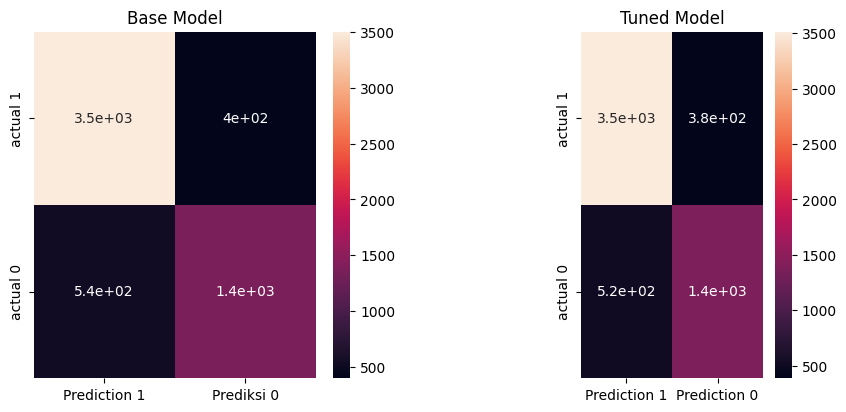

In [90]:
plt.figure(figsize = (10, 4.5))

plt.subplot(1,2,1)
sns.heatmap(df_XGB_base, annot = True)
plt.title('Base Model')

plt.subplot(1,3,3)
sns.heatmap(df_XGB_tuned, annot = True)
plt.title('Tuned Model')

In [91]:
evaluation_matrix_tuned = {
    'Logistic Regression': [acc_logreg_tuned, recall_logreg_tuned, precision_logreg_tuned, f1_logreg_tuned],
    'KNN':[acc_KNN_tuned,recall_KNN_tuned,precision_KNN_tuned, f1_KNN_tuned],
    'Decision Tree':[acc_DT_tuned, recall_DT_tuned, precision_DT_tuned, f1_DT_tuned],
    'Random Forest':[acc_RF_tuned, recall_RF_tuned, precision_RF_tuned, f1_RF_tuned],
    'XGB':[acc_XGB_tuned, recall_XGB_tuned, precision_XGB_tuned, f1_XGB_tuned]
}

eva_tuned = pd.DataFrame(data = evaluation_matrix_tuned, index = ['Accucary', 'Recall', 'Precision', 'F1 Score'])

evaluation_matrix_tuned_training = {
    "training" : [acc_logreg_tuned_train, acc_KNN_tuned_train, acc_DT_tuned_train, acc_RF_tuned_train, acc_XGB_tuned_train],
    "testing": [acc_logreg_tuned, acc_KNN_tuned, acc_DT_tuned, acc_RF_tuned, acc_XGB_tuned]
}

eva_tuned_train = pd.DataFrame(data = evaluation_matrix_tuned_training, index = ['Logreg', 'KNN', 'Decision Tree', 'Random Forest', 'XGB'])

In [92]:
display_side_by_side([eva_base, eva_base_train], ['Evaluation Matrix', 'Accuracy Train & Test'])

In [93]:
display_side_by_side([eva_tuned, eva_tuned_train], ['Evaluation Matrix', 'Accuracy Train & Test'])

**Confusion Matrix after Hypertuning**

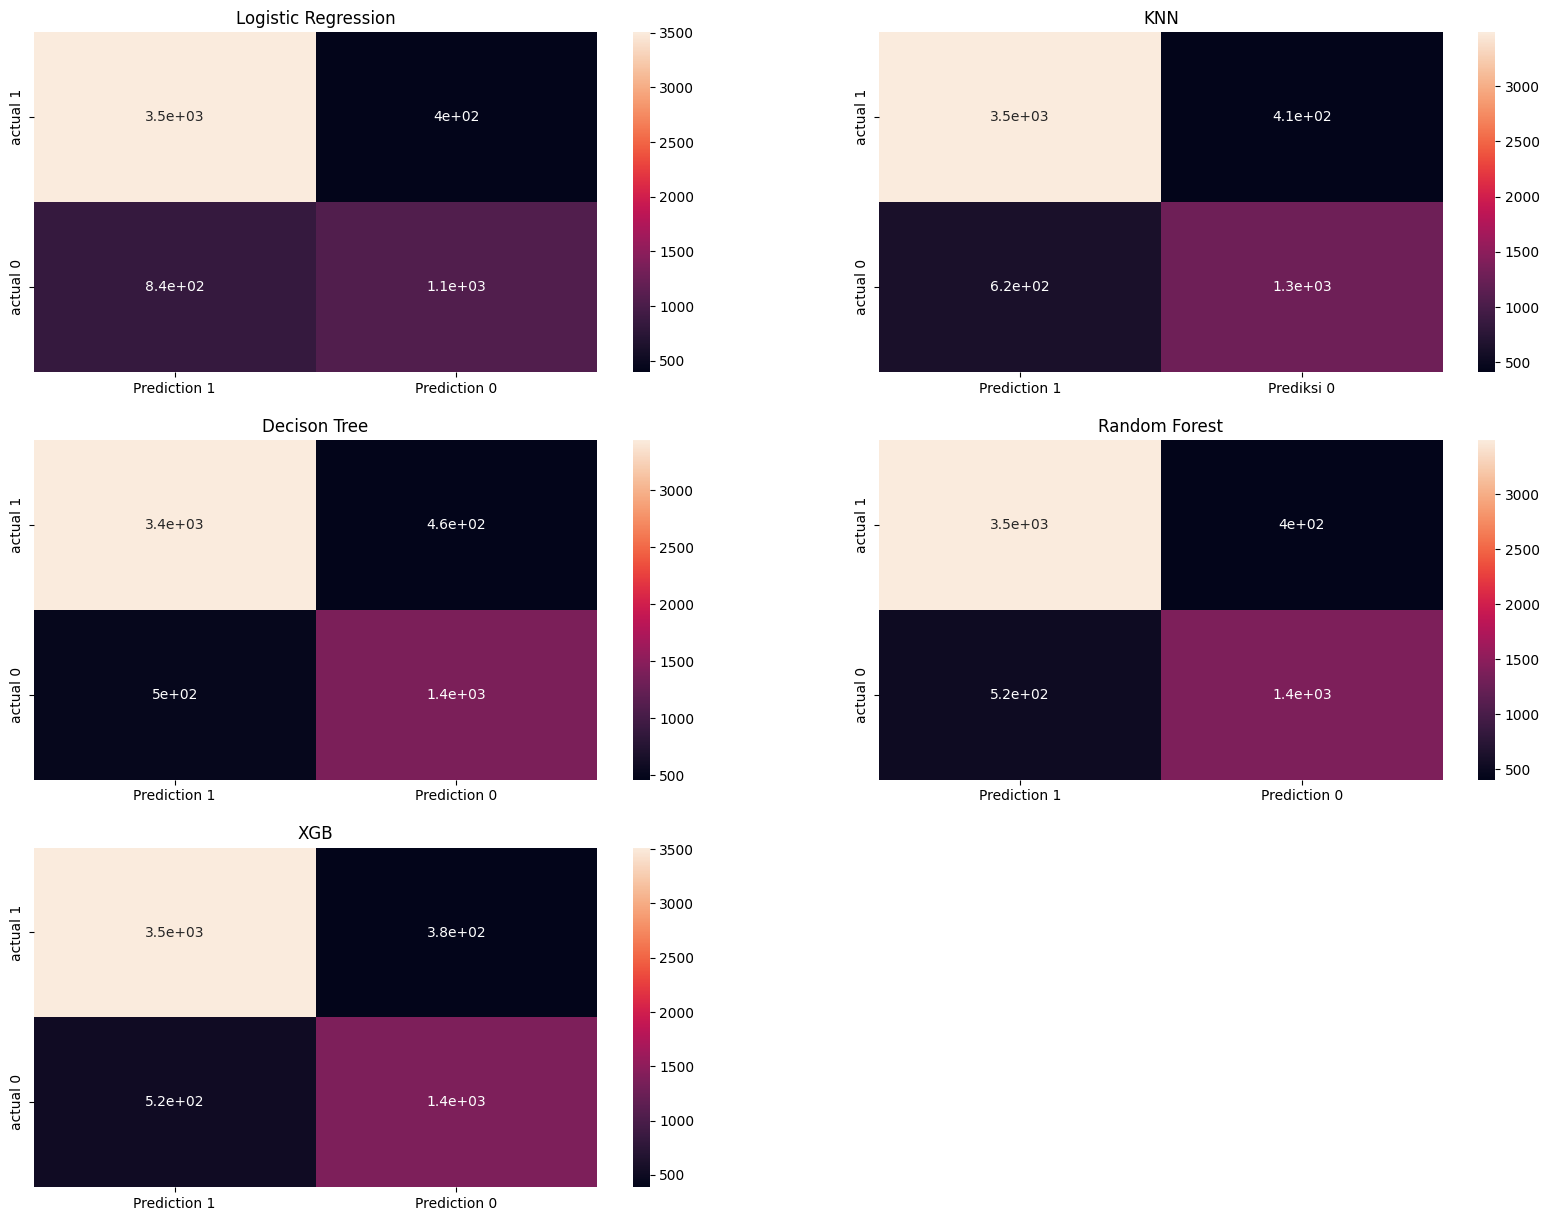

In [94]:
plt.figure(figsize = (20, 15))

plt.subplot(3,2,1)
sns.heatmap(df_logreg_tuned, annot=True)
plt.title("Logistic Regression")

plt.subplot(3,2,2)
sns.heatmap(df_KNN_tuned, annot = True)
plt.title('KNN')

plt.subplot(3,2,3)
sns.heatmap(df_DT_tuned, annot = True)
plt.title('Decison Tree')

plt.subplot(3,2,4)
sns.heatmap(df_RF_tuned, annot = True)
plt.title('Random Forest')

plt.subplot(3,2,5)
sns.heatmap(df_XGB_tuned, annot = True)
plt.title("XGB")

plt.show()